In [1]:
import csv

log_file = 'Hem0g Log.log'

# Initialize variables to store the current data
current_data = []

# Open and read the log file
with open(log_file, 'r') as file:
    lines = file.readlines()
# Initialize a CSV file counter
csv_file_count = 1

In [2]:
csv_file_name = ''
for line in lines:
    if "Starting recording for" in line:
        current_data = []
        csv_file_name = f'Logs_{line[11:19].replace(":","-")}_{csv_file_count}.csv'
    elif "End of recording" in line:
        if current_data:
            # Create a new CSV file for the current data
            
            with open(csv_file_name, 'w', newline='') as csvfile:
                csv_writer = csv.writer(csvfile)
                for data_line in current_data:
                    if len(data_line) > 50 :
                        # Extract all numeric values from the line
                        data_line = data_line.replace('.',",")
                        date = data_line[0:10]
                        time = data_line[11:19]
                        data = data_line[49:-1].split(";")
                        data.insert(0, date)
                        data.insert(1, time)
                        csv_writer.writerow(data)
            csv_file_count += 1
        current_data = []
    else:
        current_data.append(line)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def get_plot(filename_in, filename_out):

    df = pd.read_csv(filename_in, header=None, names=["Date", "Time", "Pump Speed", "Pressure2", "Pressure1", "Flow"])

    # Combine Date and Time columns into a single datetime column
    # df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S')

    # Convert numeric columns from strings with commas to floats
    numeric_columns = ["Pump Speed", "Pressure2", "Pressure1", "Flow"]
    for col in numeric_columns:
        tmp = df[col].str.replace(',', '.')
        tmp = tmp.str.replace('finish', '0')
        df[col] = tmp.astype(float)

    # Create a time series plot
    plt.figure(figsize=(12, 6))
    """plt.plot(df["Time"], df["Pressure1"], label="Pressure1")
    plt.plot(df["Time"], df["Pressure2"], label="Pressure2")
    plt.plot(df["Time"], df["Flow"], label="Flow")"""

    tmp = [i for i in range(len(df))]

    plt.plot(tmp, df["Pressure1"], label="Pressure1")
    plt.plot(tmp, df["Pressure2"], label="Pressure2")
    plt.plot(tmp, df["Flow"], label="Flow")


    plt.xlabel("Time")
    plt.ylabel("Pressure and Flow")
    plt.title("Pressure and Flow vs. Time")
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Show the plot
    plt.savefig(filename_out, dpi=300, bbox_inches='tight')

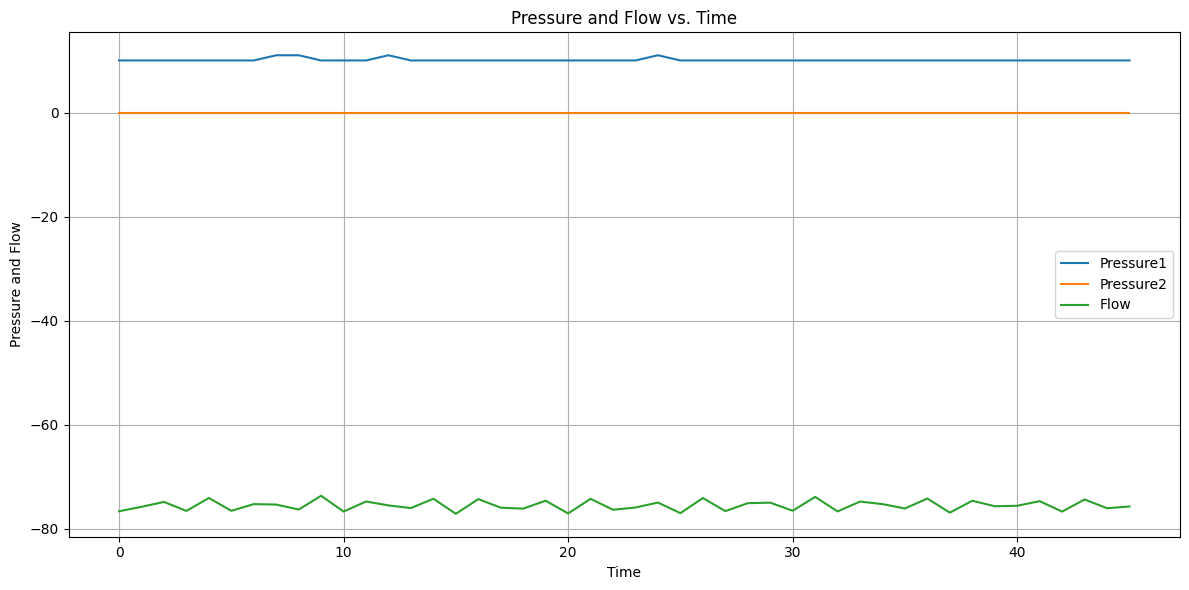

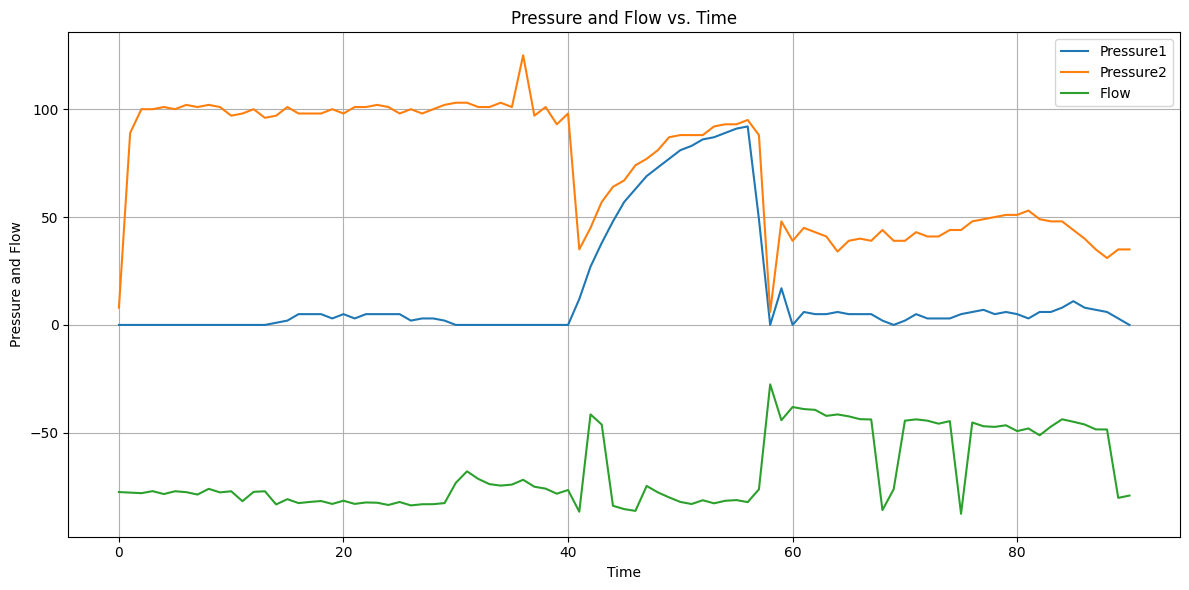

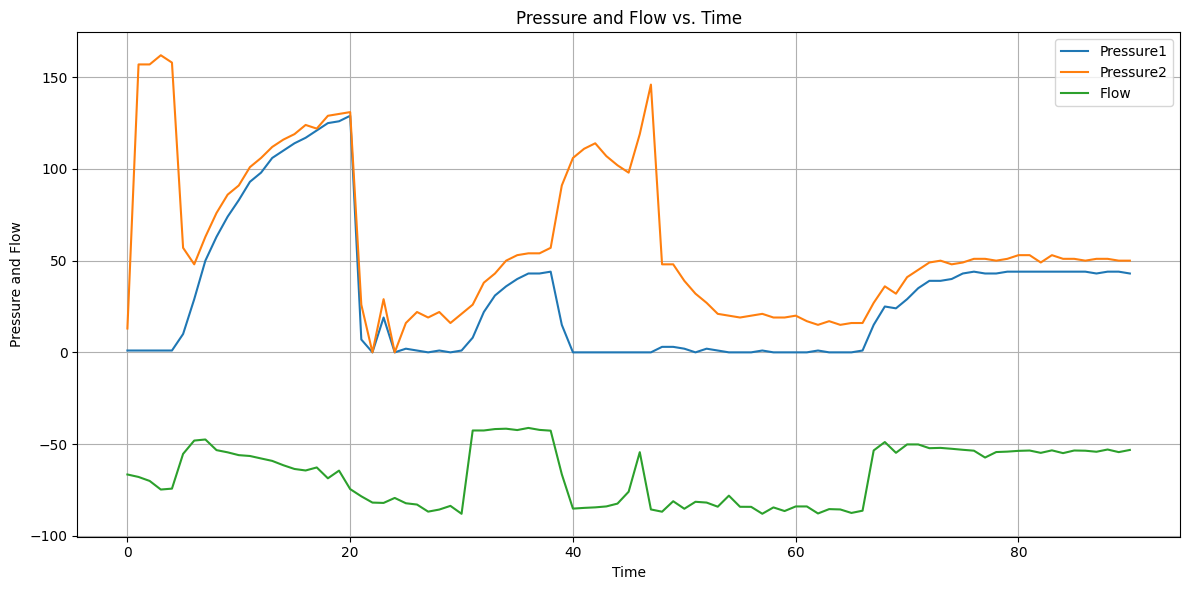

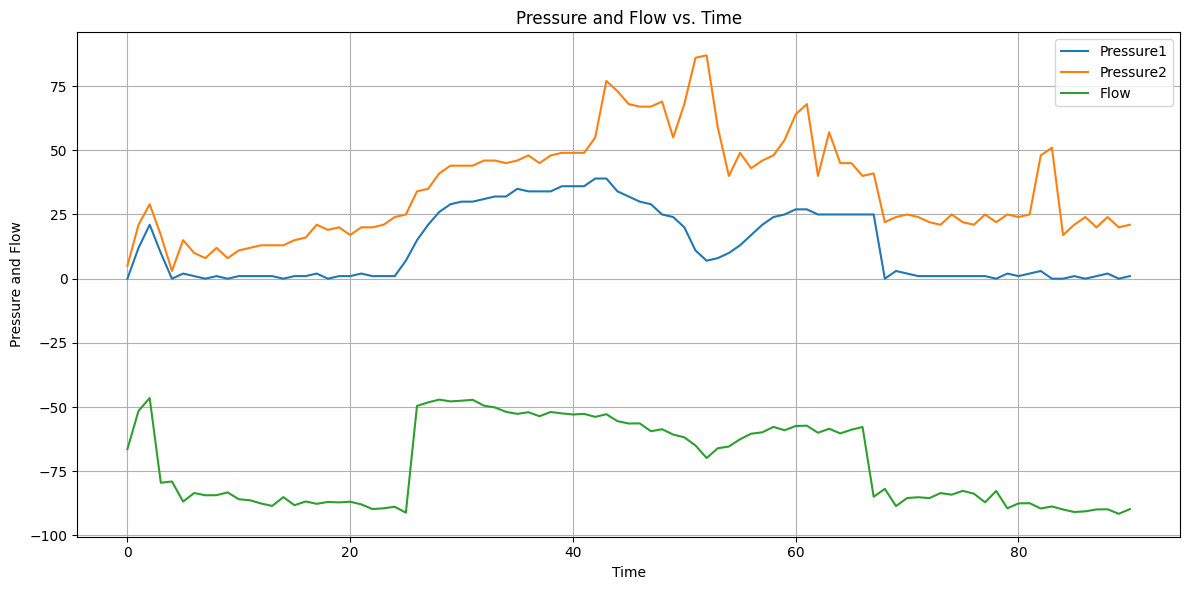

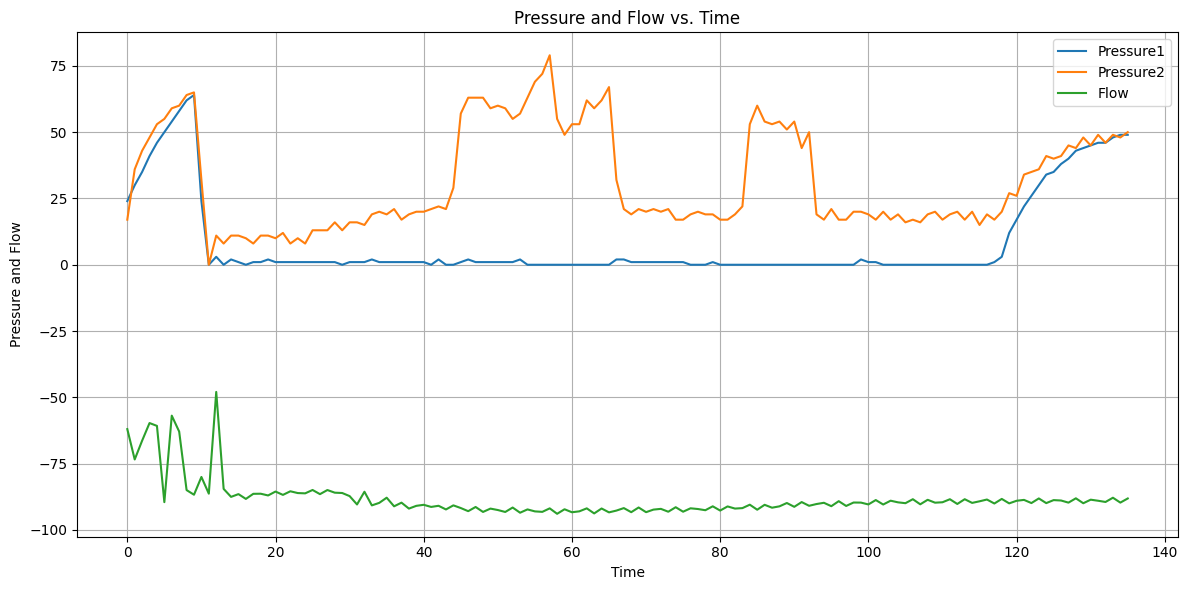

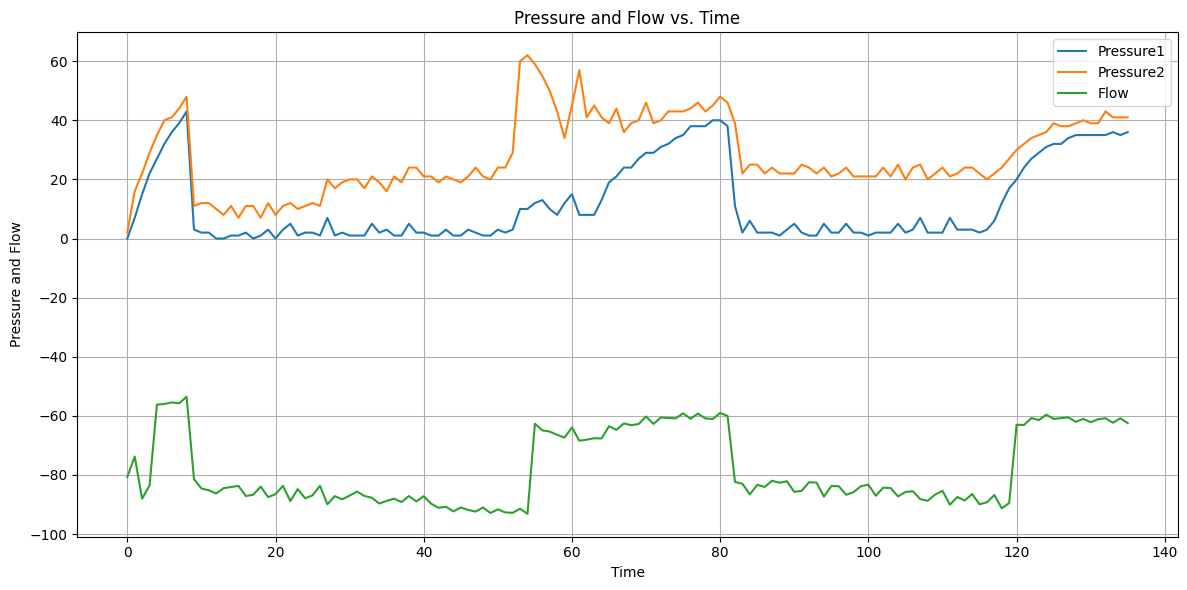

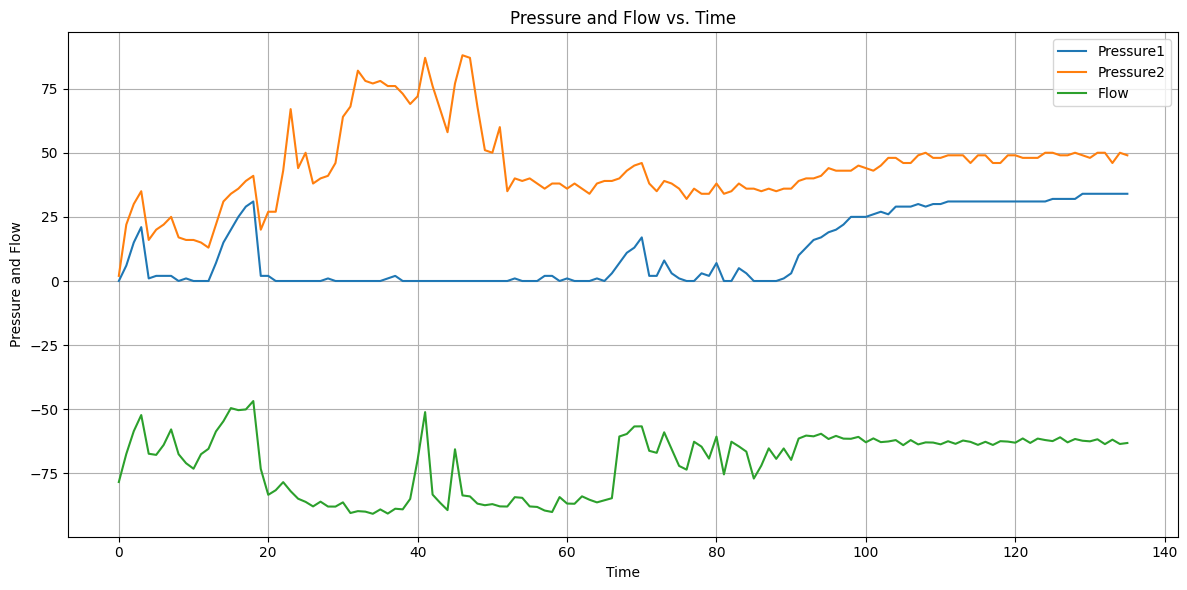

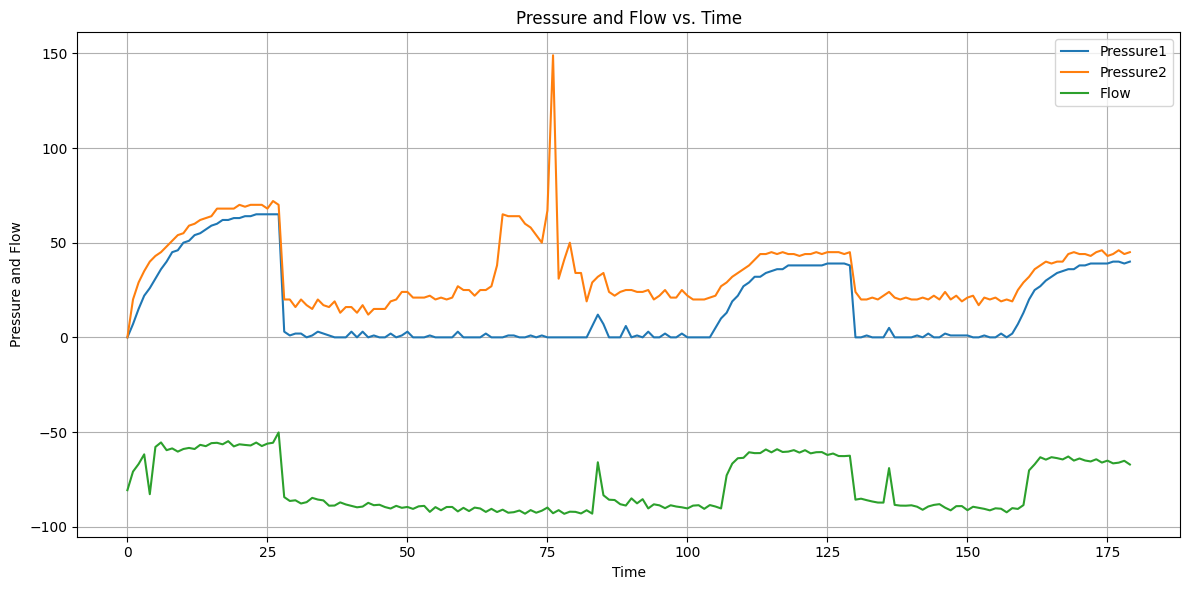

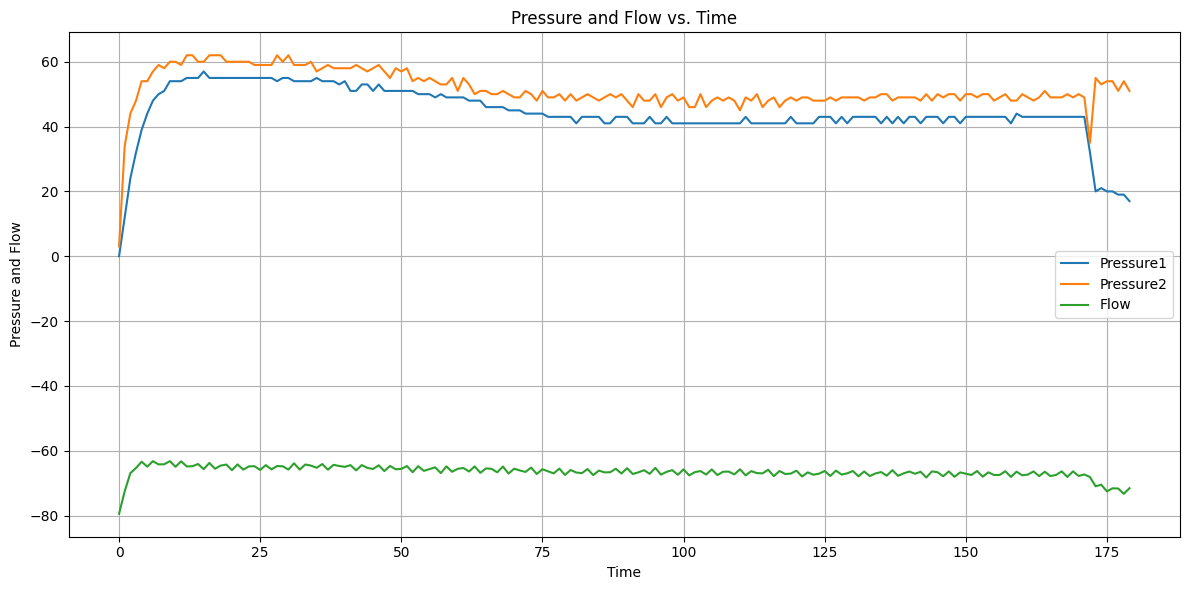

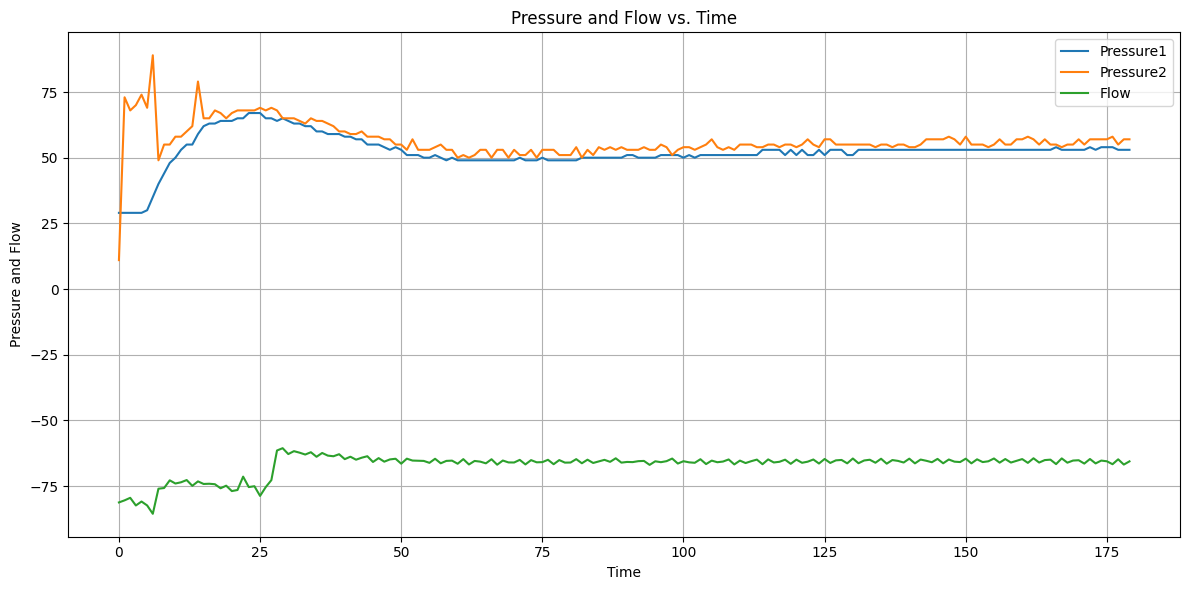

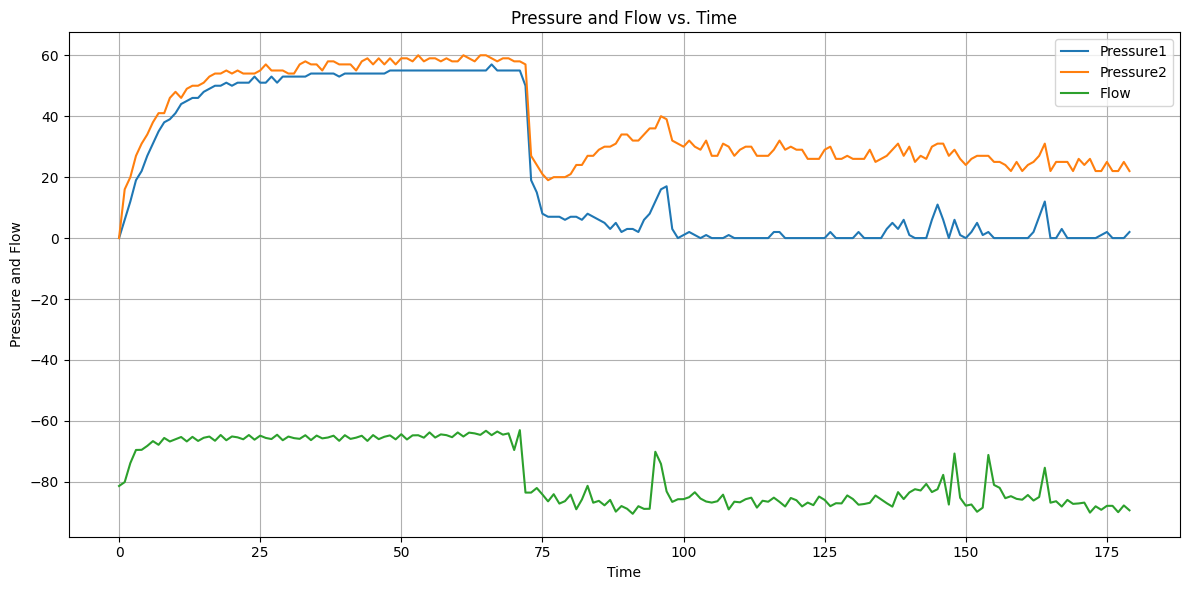

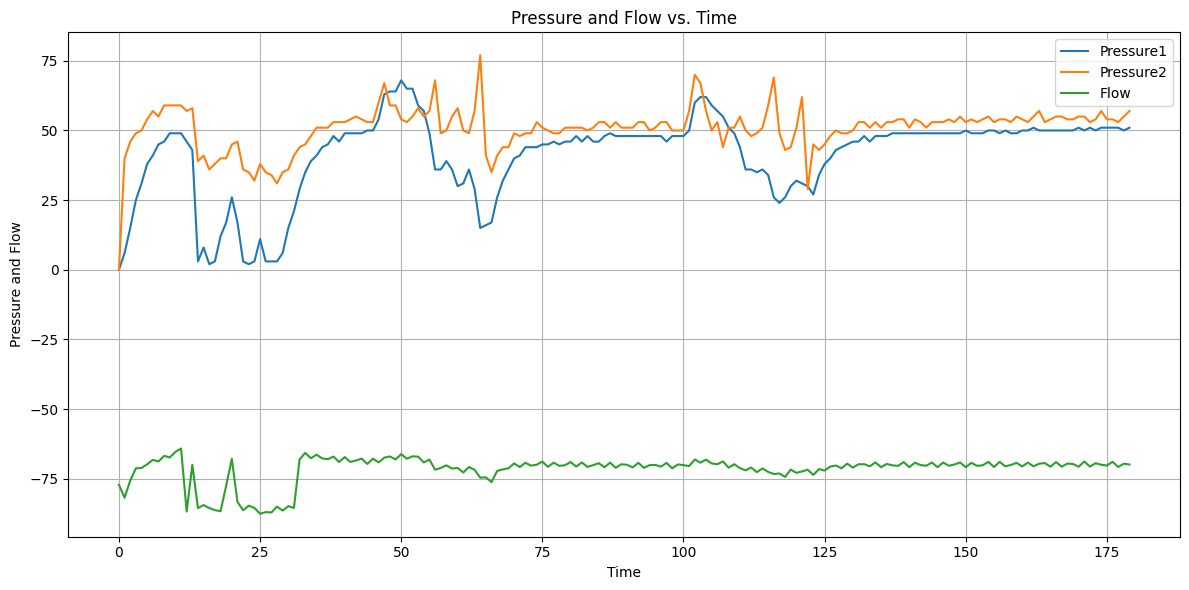

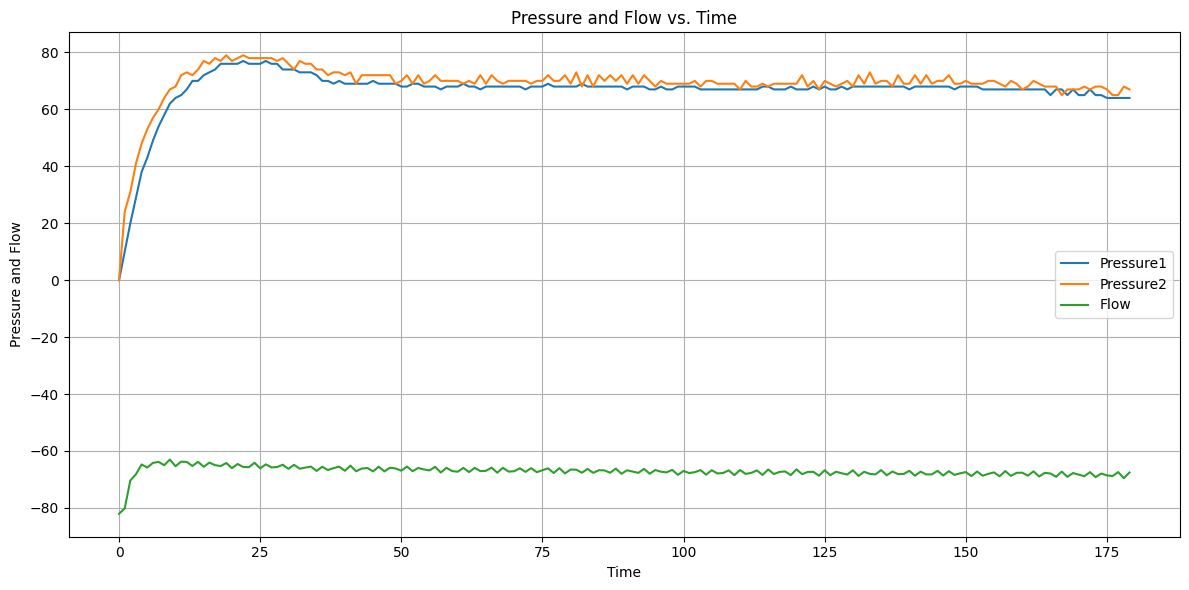

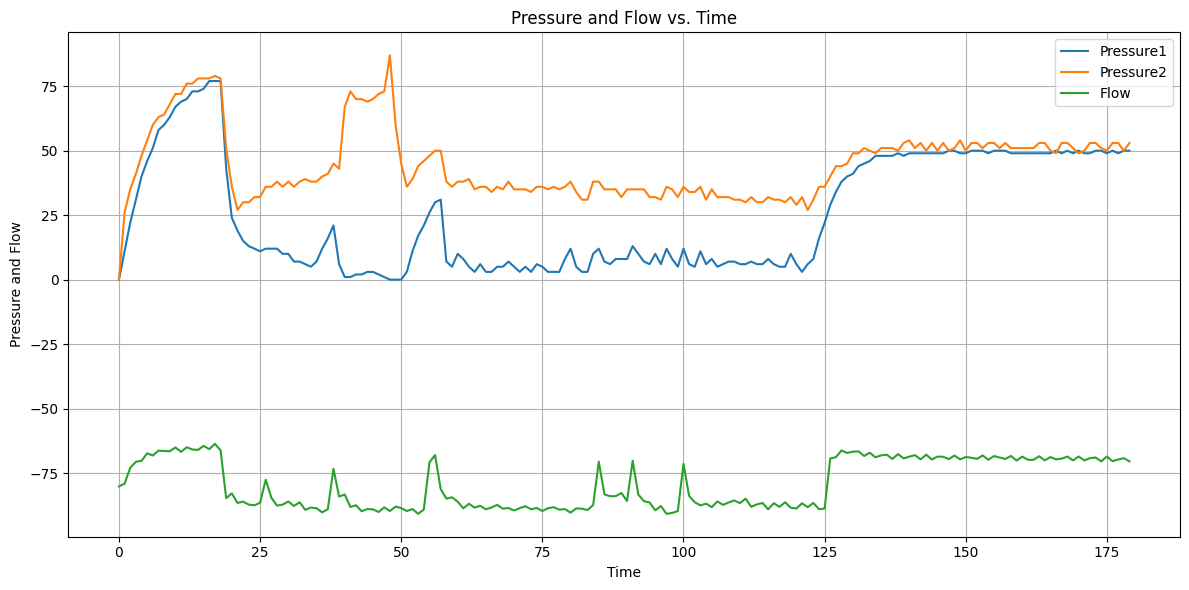

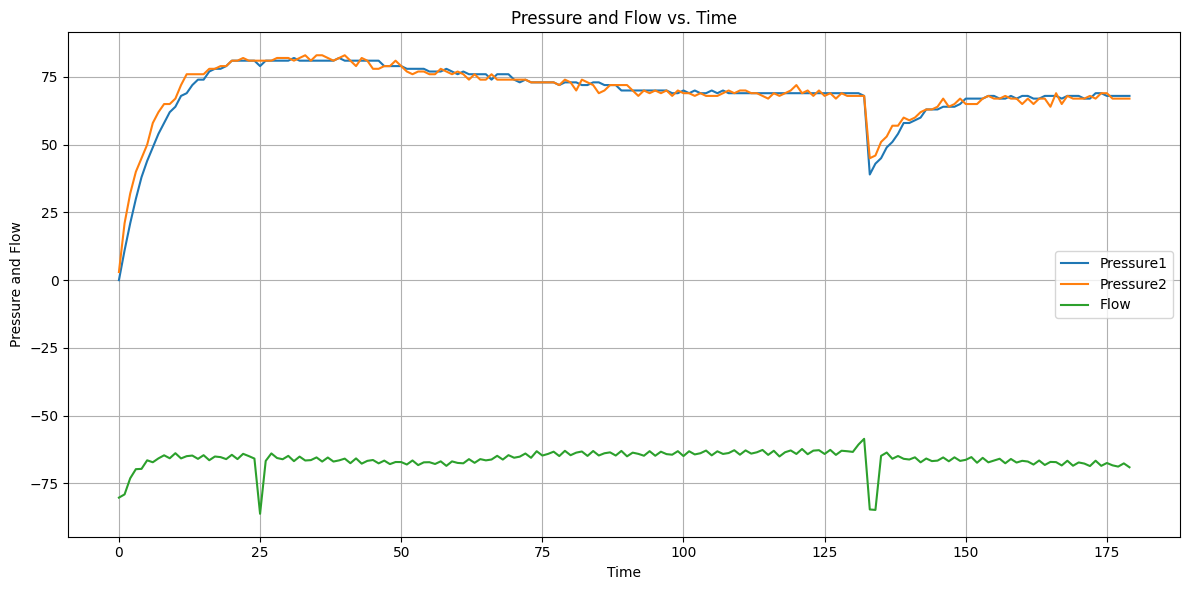

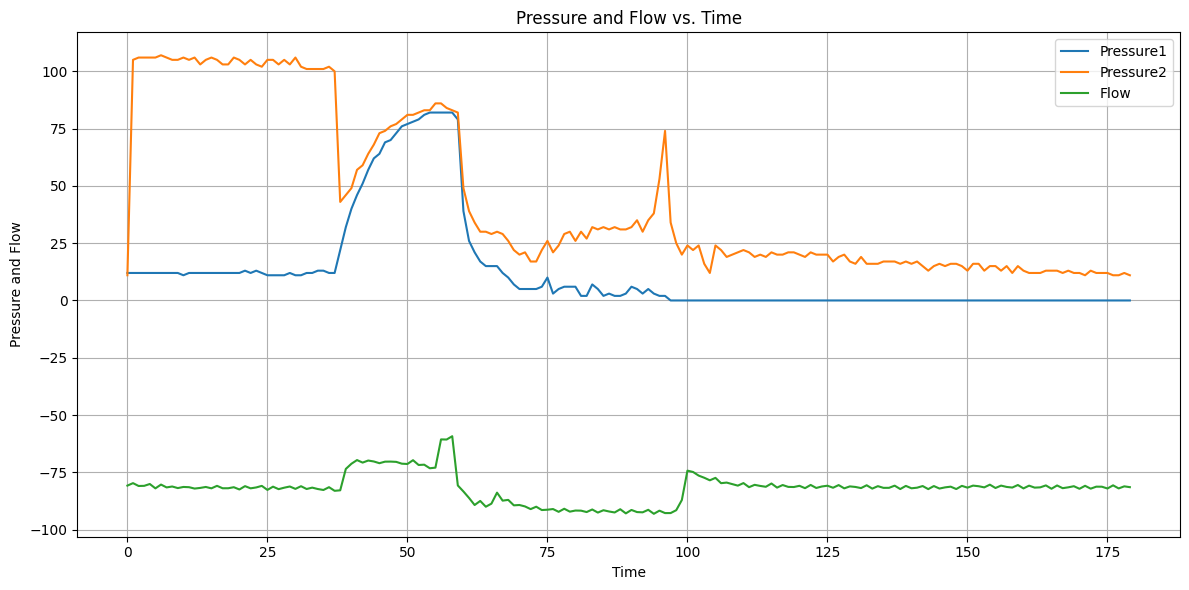

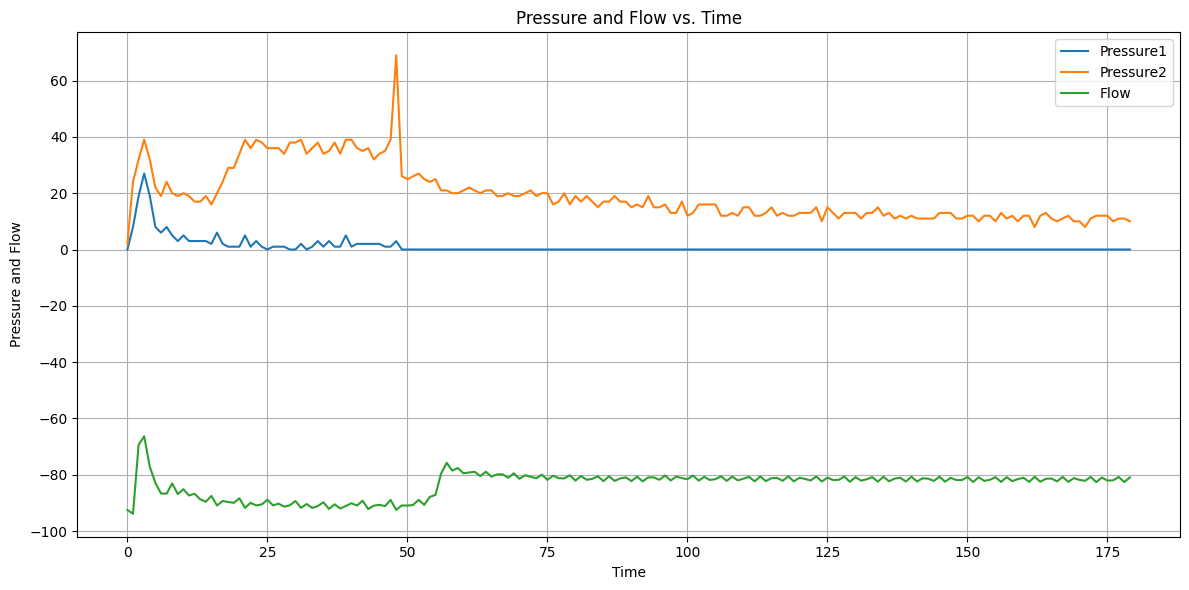

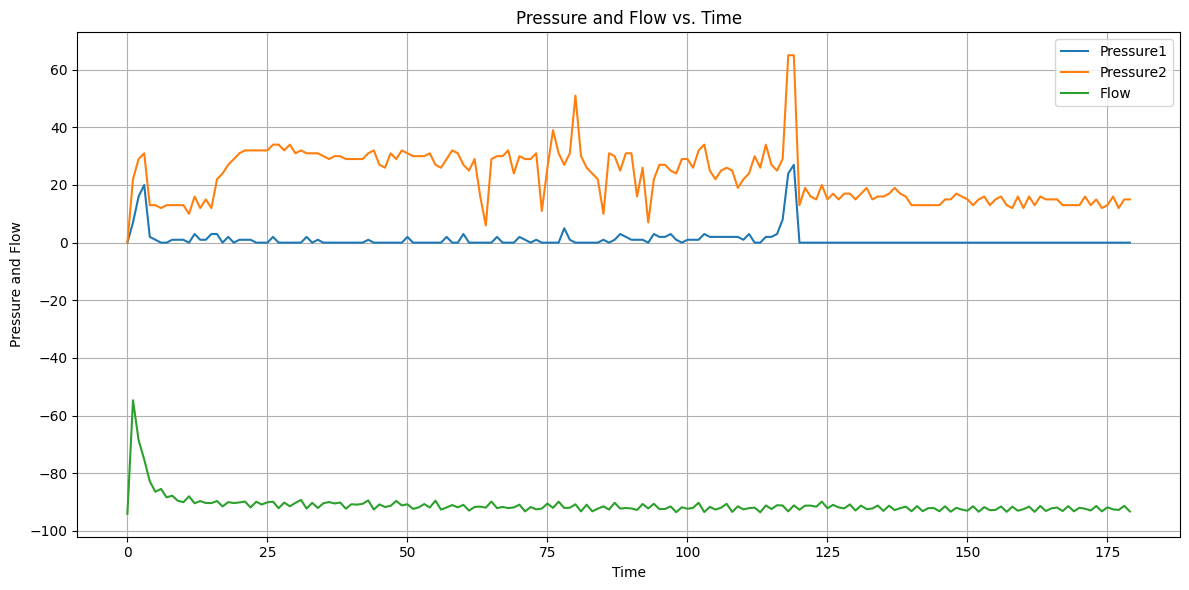

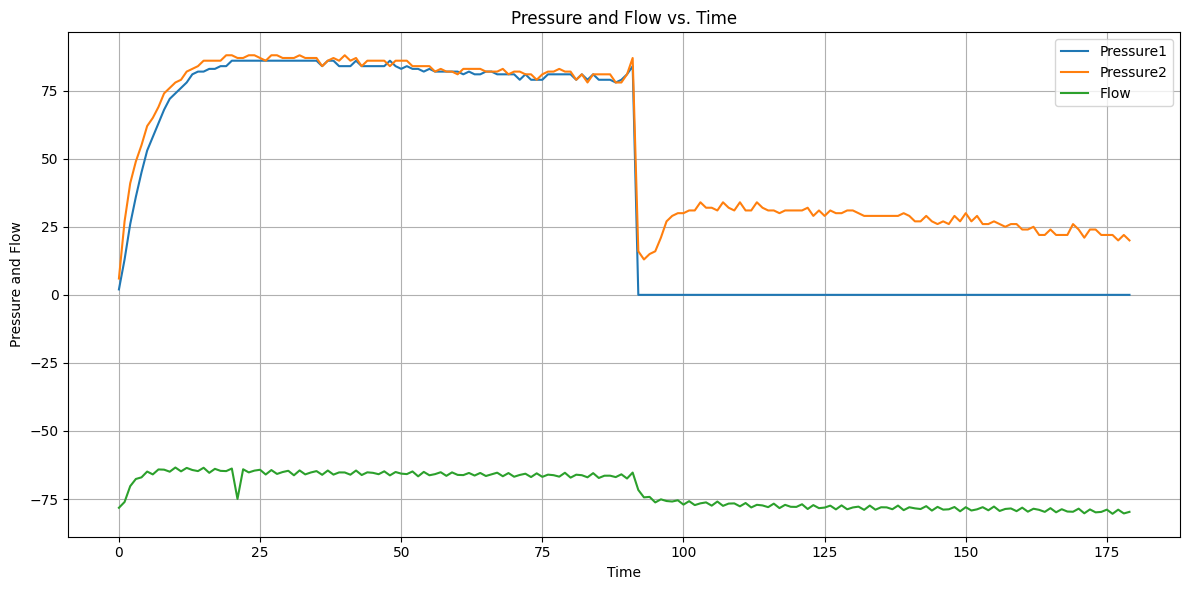

In [3]:
import os

# Get the current directory
current_directory = os.getcwd()

# List all files in the current directory
all_files = os.listdir(current_directory)

# Filter only the CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

dataframes = {}
for csv_file in csv_files:
    get_plot(csv_file, os.path.splitext(csv_file)[0]  )